In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, random, shutil, time
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sys

In [12]:
starting_dir = os.getcwd()
print (starting_dir)

/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/analysis/latest/0_before_reformat/LPR/1_merge data


In [19]:
# mac - phase I && II - LPR - tall - full fairly recent one
file_path_before_fix_full = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/LPR/latest/before_merging/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX_tall.csv'

df_before_fix_full = pd.read_csv(file_path_before_fix_full, header = 0)
df_before_fix_full['chemical.id'] = df_before_fix_full['chemical.id'].astype(str)
# 344 unique chemical IDs

df_before_fix_full = df_before_fix_full.rename({'endpoint': 'timepoint'}, axis=1)

unique_chemical_IDs = np.unique(df_before_fix_full['chemical.id'])
#display (len(unique_chemical_IDs))

# Keep only relevant columns
columns_to_keep = ['chemical.id', 'conc', 'plate.id', 'well', 'timepoint', 'value']
df_before_fix_full = df_before_fix_full.loc[:,columns_to_keep]

#I assume that dropping any na caused irregular len_time_points
#display("before dropna, len(df_before_fix_full):"+str(len(df_before_fix_full)))
#df_before_fix_full = df_before_fix_full.dropna(how='any')
#display("after dropna,  len(df_before_fix_full):"+str(len(df_before_fix_full)))

#display (df_before_fix_full.head())
#display (df_before_fix_full.tail())

In [20]:
# mac - phase I && II - LPR - tall - partial - after_Lisa_fix
file_path_after_fix_149 = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/LPR/latest/before_merging/partial/uM_removed_2592_removed/149_Toxcast_zf_LPR_data_phase_2_2021APR09.csv'

df_after_fix_149 = pd.read_csv(file_path_after_fix_149, header = 0)
df_after_fix_149['chemical.id'] = df_after_fix_149['chemical.id'].astype(str)
# 149 unique chemical IDs

df_after_fix_149 = df_after_fix_149.rename({'endpoint': 'timepoint'}, axis=1)

unique_chemical_IDs = np.unique(df_after_fix_149['chemical.id'])
#display (len(unique_chemical_IDs)) 
#display (unique_chemical_IDs)

# Keep only relevant columns
columns_to_keep = ['chemical.id', 'conc', 'plate.id', 'well', 'timepoint', 'value']
df_after_fix_149 = df_after_fix_149.loc[:,columns_to_keep]

display('before dropna, len(df_after_fix_149):' + str(len(df_after_fix_149)))
df_after_fix_149 = df_after_fix_149.dropna(how='any')
display("after dropna,  len(df_after_fix_149):"+str(len(df_after_fix_149)))
# this didn't drop any rows

#display(df_after_fix_149.head())
#display(df_after_fix_149.tail())

'before dropna, len(df_after_fix_149):429120'

'after dropna,  len(df_after_fix_149):429120'

In [ ]:
start_time = time.time()

len_timepoint = []

def merge(chemical_index, df_before_fix_full, df_after_fix_149, df_merged):
    df_before_fix_per_chemical = df_before_fix_full.loc[df_before_fix_full['chemical.id'] == str(chemical_index),:]
    #display ('before_fix:', df_before_fix_per_chemical.tail(1))
    
    df_after_fix_per_chemical  = df_after_fix_149.loc[df_after_fix_149['chemical.id'] == str(chemical_index),:]
    #display ("after_fix:", df_after_fix_per_chemical.tail(1))
    
    if (df_after_fix_per_chemical.empty == False):
        print ("replaced with fixed one")
        df_merged = pd.concat([df_merged, df_after_fix_per_chemical])
        len_timepoint.append(len(np.unique(df_after_fix_per_chemical['timepoint'])))
    else:
        df_merged = pd.concat([df_merged, df_before_fix_per_chemical])
        len_timepoint.append(len(np.unique(df_before_fix_per_chemical['timepoint'])))
    
    display ("np.unique(len_timepoint):" + str(np.unique(len_timepoint)))
        
    return df_merged
########### end of def merge()

df_merged = pd.DataFrame()

full_devel = "full"
#full_devel = "devel"

chemical_id_from_here = np.unique(df_before_fix_full['chemical.id'])
if (full_devel == "devel"):
    randomly_chosen = random.sample(set(chemical_id_from_here), 2)
    chemical_id_from_here = []
    for i in range(len(randomly_chosen)):
        chemical_id_from_here.append(randomly_chosen[i])

#all_chemical_id_s = [2752]

total_number_of_chemicals_to_processed = len(chemical_id_from_here)
number_of_chemicals_processed = 0

for chemical_index in chemical_id_from_here:
    print("\nchemical_index:" + str(chemical_index))
    number_of_chemicals_processed += 1
    df_merged = merge(chemical_index, df_before_fix_full, df_after_fix_149, df_merged)
    write_this = str(number_of_chemicals_processed) + " chemicals processed out of " + str(total_number_of_chemicals_to_processed)
    print(write_this)

display(df_merged.head())
df_merged.to_csv("merged.csv", index=False)

end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took)) 
# took 12 minutes for 335 chemicals

<AxesSubplot:ylabel='count'>

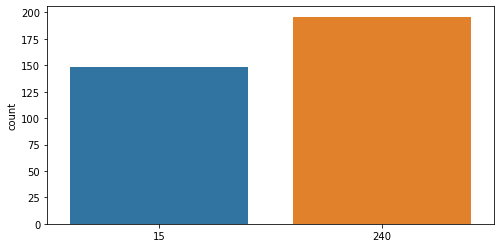

In [23]:
ds = pd.Series({"Column": len_timepoint})
plt.figure(figsize=(8,4))
sns.countplot(x="Column", data=ds)

In [ ]:
# count len_timepoint

len_timepoint = []

# temp
file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/LPR/latest/after_merging/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX_tall_fixed.csv'
df_merged = pd.read_csv(file_path, header = 0)

chemical_id_from_here = np.unique(df_merged['chemical.id'])

total_number_of_chemicals_to_processed = len(chemical_id_from_here)
number_of_chemicals_processed = 0

for chemical_index in chemical_id_from_here:
    df_chemical = df_merged.loc[df_merged['chemical.id'] == chemical_index,:]
    print("chemical_index:" + str(chemical_index))
    
    len_timepoint.append(len(np.unique(df_chemical['timepoint'])))
    
    number_of_chemicals_processed += 1
    write_this = str(number_of_chemicals_processed) + " chemicals processed out of " + str(total_number_of_chemicals_to_processed)
    print(write_this)
    
ds = pd.Series({"Column": len_timepoint})
plt.figure(figsize=(8,4))
sns.countplot(x="Column", data=ds)

## below is investigation

In [ ]:
# investigation
'''
ds = pd.Series({"Column": len_timepoint})
plt.figure(figsize=(8,4))
#plt.savefig("distribute.png")
sns.countplot(x="Column", data=ds)
'''

In [85]:
is_NaN = df_before_fix_full.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_before_fix_full[row_has_NaN]

display(len(rows_with_NaN))
display(rows_with_NaN.head())
display(rows_with_NaN.tail())

11184240

,chemical.id,conc,plate.id,well,timepoint,value,bottle.id
0,1030,NaN,NaN,NaN,t0,NaN,NaN
1,1030,0.0,9414.0,A06,t0,0.0,NaN
2,1030,0.0,9414.0,A12,t0,2.7,NaN
3,1030,0.0,9414.0,B06,t0,0.5,NaN
4,1030,0.0,9414.0,B12,t0,0.0,NaN


,chemical.id,conc,plate.id,well,timepoint,value,bottle.id
11610475,998,67.0,15822.0,A08,t239,0.0,NaN
11610476,998,67.0,15822.0,A09,t239,0.0,NaN
11610477,998,67.0,15822.0,A10,t239,0.0,NaN
11610478,998,67.0,15822.0,A11,t239,0.0,NaN
11610479,998,67.0,15822.0,A12,t239,0.0,NaN


In [82]:
nan = df_before_fix_full[df_before_fix_full['value'].isna()]
display(len(nan))
display(nan.head())
display(nan.tail())

206801

,chemical.id,conc,plate.id,well,timepoint,value,bottle.id
0,1030,NaN,NaN,NaN,t0,NaN,NaN
193,1030,NaN,NaN,NaN,t1,NaN,NaN
386,1030,NaN,NaN,NaN,t2,NaN,NaN
579,1030,NaN,NaN,NaN,t3,NaN,NaN
772,1030,NaN,NaN,NaN,t4,NaN,NaN


,chemical.id,conc,plate.id,well,timepoint,value,bottle.id
11471275,965,NaN,NaN,NaN,t235,NaN,NaN
11471468,965,NaN,NaN,NaN,t236,NaN,NaN
11471661,965,NaN,NaN,NaN,t237,NaN,NaN
11471854,965,NaN,NaN,NaN,t238,NaN,NaN
11472047,965,NaN,NaN,NaN,t239,NaN,NaN


In [79]:
display("before dropna, len(df_before_fix_full):"+str(len(df_before_fix_full)))
df_before_fix_full = df_before_fix_full.dropna(how='any')
# phase I & II -> dropped some
display("after dropna,  len(df_before_fix_full):"+str(len(df_before_fix_full)))

df_before_fix_full['plate.id'] = df_before_fix_full['plate.id'].astype(int)

#display (np.unique(df_before_fix_full['plate.id']))
display(df_before_fix_full.head())

'before dropna, len(df_before_fix_full):11610480'

'after dropna,  len(df_before_fix_full):426240'

,chemical.id,conc,plate.id,well,timepoint,value,bottle.id
230880,1119,6.4,1,A8,t3,11.3,TX003365
230881,1119,0.0,2,F6,t3,0.0,TX003365
230882,1119,0.0,2,C6,t3,43.4,TX003365
230883,1119,0.0,2,D6,t3,37.2,TX003365
230884,1119,6.4,1,G2,t3,0.0,TX003365


In [ ]:
# (no issue) mac - phase I && II - LPR - tall - before_Lisa_fix - before updating plate.id
file_path_before_fix_full = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/LPR/latest/before_merging/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX_tall_fixed.csv'

df_before_fix_full = pd.read_csv(file_path_before_fix_full, header = 0)
df_before_fix_full['chemical.id'] = df_before_fix_full['chemical.id'].astype(str)
# 344 unique chemical IDs

df_before_fix_full = df_before_fix_full.rename({'endpoint': 'timepoint'}, axis=1)

unique_chemical_IDs = np.unique(df_before_fix_full['chemical.id'])
#display (len(unique_chemical_IDs))

display (df_before_fix_full.head())

In [55]:
df_part = df_before_fix_full[df_before_fix_full['chemical.id']=='1030']

display(df_part.head())
display(df_part.tail())

output_filename = str(file_path_before_fix_full[:-4]) + "_chemical_id_1030.csv"
df_part.to_csv(output_filename, index=False)

,chemical.id,bottle.id,conc,plate.id,well,endpoint,value
4248569,1030,C48962,0.0,9414,A06,t0,0.0
4248570,1030,C48962,0.0,9414,A12,t0,2.7
4248571,1030,C48962,0.0,9414,B06,t0,0.5
4248572,1030,C48962,0.0,9414,B12,t0,0.0
4248573,1030,C48962,0.0,9414,C06,t0,0.0


,chemical.id,bottle.id,conc,plate.id,well,endpoint,value
11600635,1030,C48962,50.0,9509,F07,t239,0.0
11600636,1030,C48962,50.0,9509,G01,t239,0.0
11600637,1030,C48962,50.0,9509,G07,t239,0.0
11600638,1030,C48962,50.0,9509,H01,t239,0.0
11600639,1030,C48962,50.0,9509,H07,t239,0.0


In [61]:
display("before dropna, len(df_after_fix_149):"+str(len(df_after_fix_149)))
df_after_fix_149 = df_after_fix_149.dropna(how='any')
# didn't drop any
display("after dropna,  len(df_after_fix_149):"+str(len(df_after_fix_149)))

df_after_fix_149['plate.id'] = df_after_fix_149['plate.id'].astype(int)

#display (np.unique(df_before_fix_full['plate.id']))
display(df_after_fix_149.head())

'before dropna, len(df_after_fix_149):429120'

'after dropna,  len(df_after_fix_149):429120'

,chemical.id,bottle.id,conc,plate.id,well,endpoint,value
0,2752,TX000657,0.64,2,B3,t3,0.4
1,2752,TX000657,0.64,1,F3,t3,0.0
2,2752,TX000657,6.40,2,B8,t3,37.5
3,2752,TX000657,0.64,1,C3,t3,0.0
4,2752,TX000657,0.64,2,F3,t3,0.0


In [63]:
display(np.unique(df_merged['plate.id']))


array([    1,     2,  8458,  8656,  8901,  8902,  8931,  8961,  8962,
        8963,  8978,  8979,  8980,  8985,  9284,  9285,  9289,  9290,
        9295,  9296,  9302,  9369,  9370,  9391,  9406,  9407,  9408,
        9409,  9410,  9414,  9419,  9431,  9432,  9433,  9455,  9464,
        9509,  9510,  9512,  9515,  9517,  9518,  9520,  9532,  9540,
        9541,  9544,  9545,  9547,  9553,  9554,  9556,  9557,  9558,
        9559,  9561,  9563,  9567,  9568,  9569,  9570,  9579,  9580,
        9584,  9585,  9589,  9592,  9598,  9601,  9602,  9603,  9604,
        9620,  9623,  9624,  9628,  9629,  9632,  9650,  9651,  9652,
        9653,  9661,  9675,  9682,  9683,  9688,  9690,  9730,  9746,
        9751,  9765,  9770,  9796,  9797,  9832,  9835,  9837,  9838,
        9839,  9844,  9845,  9846,  9847,  9848,  9855,  9869,  9974,
        9975,  9976,  9977,  9978,  9979,  9980,  9981,  9982,  9983,
        9985,  9987,  9988,  9989,  9990,  9991,  9992,  9993, 10061,
       10067, 10075,

In [ ]:
# not working
#df_after_fix_149 = df_after_fix_149.replace(to_replace = " uM", value = "")
#display(df_after_fix_149.head())

#df_after_fix_per_chemical = df_after_fix_149.loc[df_after_fix_149['chemical.id'] == '2752',:]
#display (df_after_fix_per_chemical.head())

#df_after_fix_per_chemical = df_after_fix_per_chemical

In [ ]:
# (issue) mac - phase I && II - LPR - tall - before_Lisa_fix
file_path_before_fix_full = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/LPR/after_Lisa_fix/full/old/both_endpoints_type_in_1_file/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX_tall_fixed.csv'

df_before_fix_full = pd.read_csv(file_path_before_fix_full, header = 0)
df_before_fix_full['chemical.id'] = df_before_fix_full['chemical.id'].astype(str)
# 344 unique chemical IDs

unique_chemical_IDs = np.unique(df_before_fix_full['chemical.id'])
display (len(unique_chemical_IDs))
display (unique_chemical_IDs)

display(df_before_fix_full.head())

df_before_fix_full['plate.id'] = df_before_fix_full['plate.id'].astype(str)

display (np.unique(df_before_fix_full['plate.id']))

#"TypeError: '<' not supported between instances of 'float' and 'str'"


#display(len(df_before_fix_full))

In [88]:
# this is not working,,,



def remove_uM(conc_index, df_merged, df_merged_uM_removed):
    display ('df_merged:', df_merged.tail(1))
    
    # df_before_fix_per_chemical = df_before_fix_full.loc[df_before_fix_full['chemical.id'] == str(chemical_index),:]
    df_merged_per_conc = df_merged.loc[df_merged["conc"] == str(conc_index),:]
    display ('before_fix:', df_merged_per_conc.tail(1))
    a=b
    display(np.unique(df_merged_per_conc))
        
    return df_merged_uM_removed
########### end of def remove_uM()


df_merged_uM_removed = pd.DataFrame()

#full_devel = "full"
full_devel = "devel"

all_conc = np.unique(df_merged['chemical.id'])
if (full_devel == "devel"):
    randomly_chosen = random.sample(set(all_conc), 2)
    all_conc = []
    for i in range(len(randomly_chosen)):
        all_conc.append(randomly_chosen[i])

for conc_index in all_conc:
    print("\n\nconc_index:" + str(conc_index))
    df_merged_uM_removed = remove_uM(conc_index, df_merged, df_merged_uM_removed)

merged.to_csv("merged.csv", index=False)

# df_merged.conc = df_merged.conc.replace(" uM", "")
    
#replaced = df_merged["conc"].str.replace("uM", "")
#    print (replaced)
#    if (replaced != "NA"):
#        df_merged["conc"] = replaced




conc_index:296


'df_merged:'

,chemical.id,bottle.id,conc,plate.id,well,endpoint,value
413183,1606,TX003387,0 uM,1,H6,t17,0.0


'before_fix:'

,chemical.id,bottle.id,conc,plate.id,well,endpoint,value


NameError: name 'b' is not defined

In [45]:
#all_chemical_id_s_merged = np.unique(str(merged['chemical.id']))
#all_chemical_id_s_merged = np.unique(merged['chemical.id'])
#display(all_chemical_id_s_merged)

array([  57,  332,  380,  778, 1161, 1187, 1614, 2686, 2877, 2893])